## Aggregating results to DataFrame

In [41]:
import os
import lib
import numpy as np
import pandas as pd
from table_evaluator import load_data, TableEvaluator
from ctgan import CTGAN


In [18]:
syndata_array = np.load('/home/vtn/master/tab-ddpm-main/exp/churn2/ddpm_cb_best/X_num_train.npy')


In [19]:
syndataPD = pd.DataFrame(syndata_array)
syndataPD

,0,1,2,3,4,5,6
0,496.0466,31.2624,7.0000,"163,320.9504",1.0000,"64,411.8544","64,579.9106"
1,659.9193,23.0000,6.0000,"157,781.6371",1.0000,"51,535.7299","51,545.6187"
2,562.4032,34.0000,3.0000,0.0000,2.0000,"78,860.9040","78,745.4352"
3,655.7466,39.0000,7.0000,"109,337.7609",2.0000,"110,103.7308","109,582.6063"
4,444.8195,38.0000,3.0000,"102,306.6174",2.0000,"15,912.7247","15,947.6713"
...,...,...,...,...,...,...,...
25995,789.4662,30.1985,1.0000,0.0000,2.0000,"64,121.3175","64,200.6129"
25996,846.9588,54.0000,4.0000,"149,524.4711",1.0000,"97,808.7953","97,943.2908"
25997,671.0101,38.0000,9.0000,0.0000,2.0000,"83,919.5013","83,975.5345"
25998,688.7993,40.0000,2.0000,"98,033.6028",1.0000,"184,986.0688","185,094.1501"


In [20]:
origdata_array = np.load('/home/vtn/master/tab-ddpm-main/data/churn2/X_num_train.npy')

In [21]:
origdataPD = pd.DataFrame(origdata_array)
origdataPD

,0,1,2,3,4,5,6
0,838.0000,35.0000,0.0000,0.0000,2.0000,"197,305.9062","197,305.9062"
1,661.0000,44.0000,1.0000,"141,136.6250",1.0000,"189,742.7812","189,742.7812"
2,547.0000,62.0000,10.0000,"127,738.7500",2.0000,"85,153.0000","85,153.0000"
3,615.0000,41.0000,4.0000,"130,385.8203",1.0000,"130,661.9531","130,661.9531"
4,721.0000,40.0000,3.0000,0.0000,1.0000,"144,874.6719","144,874.6719"
...,...,...,...,...,...,...,...
6395,626.0000,62.0000,3.0000,0.0000,1.0000,"65,010.7383","65,010.7383"
6396,801.0000,38.0000,5.0000,0.0000,2.0000,"66,256.2734","66,256.2734"
6397,619.0000,56.0000,7.0000,0.0000,2.0000,"42,442.2109","42,442.2109"
6398,569.0000,42.0000,1.0000,0.0000,1.0000,"83,629.6016","83,629.6016"


In [22]:
from table_evaluator import load_data, TableEvaluator

In [23]:
real, fake = origdataPD, syndataPD

In [24]:
table_evaluator = TableEvaluator(real, fake)

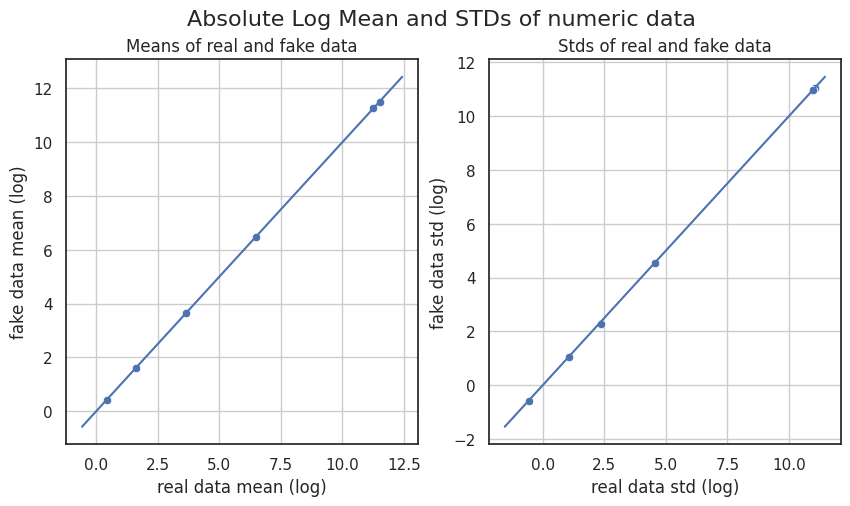

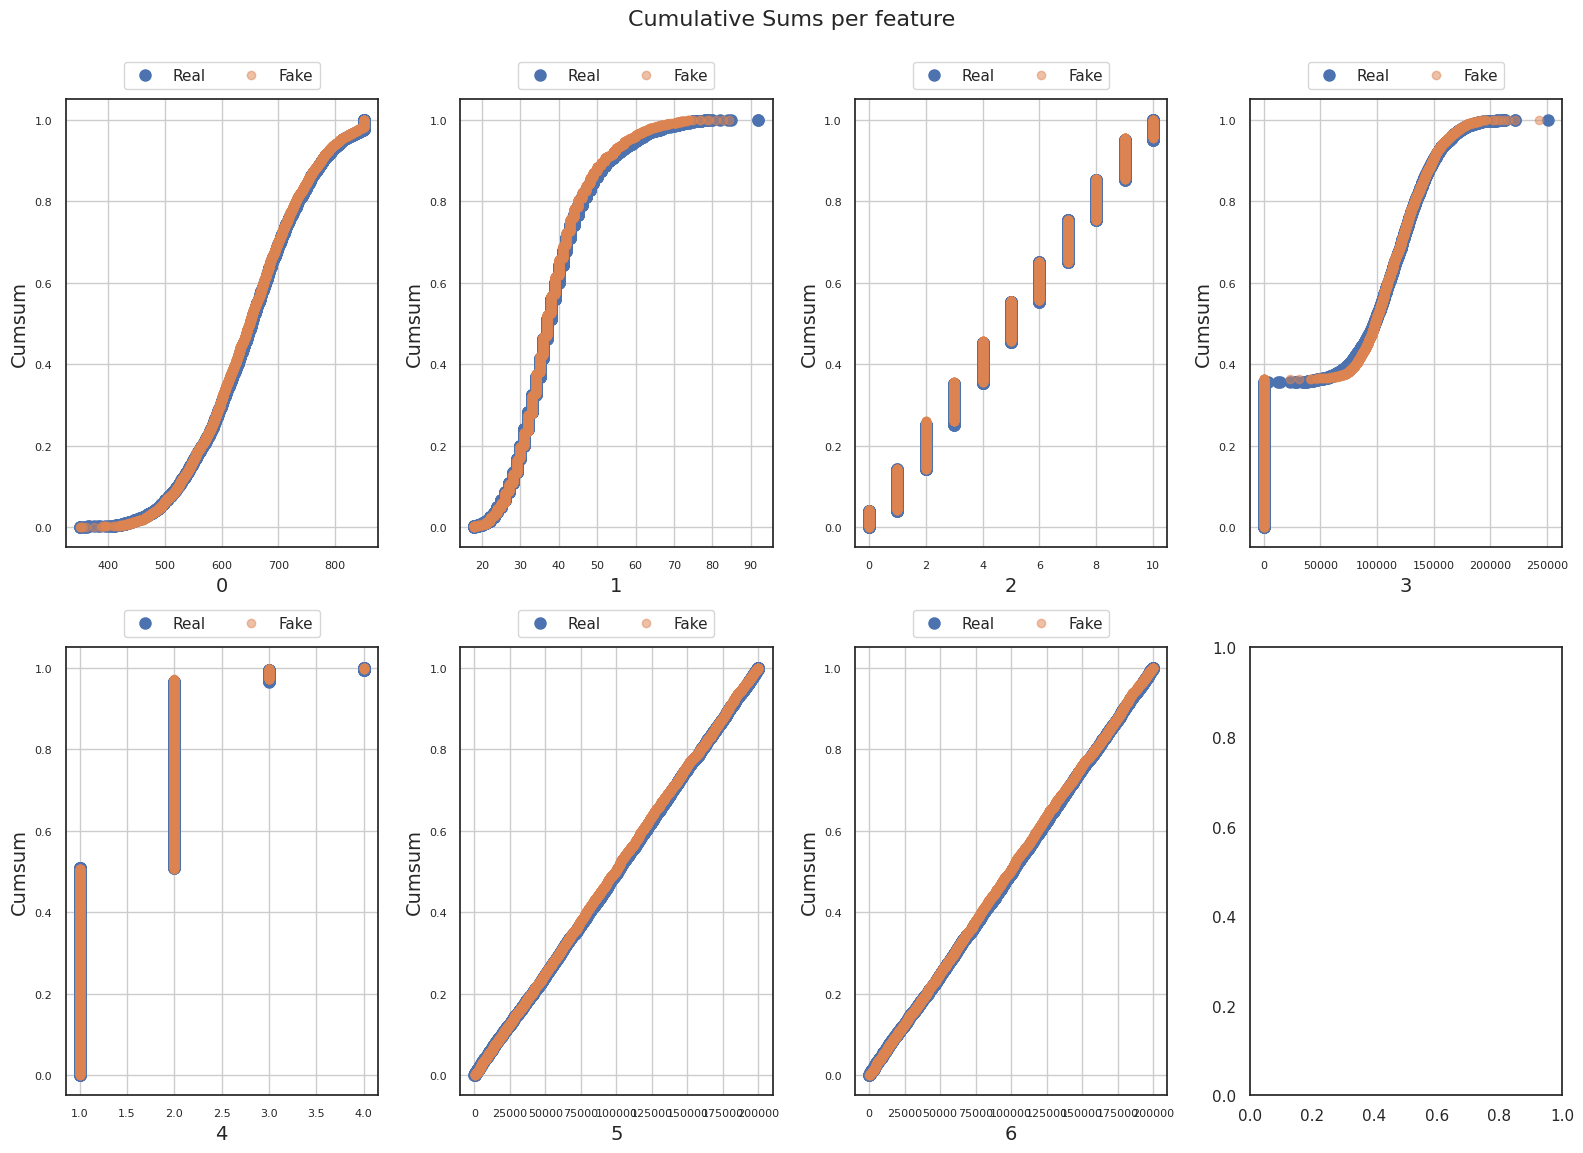

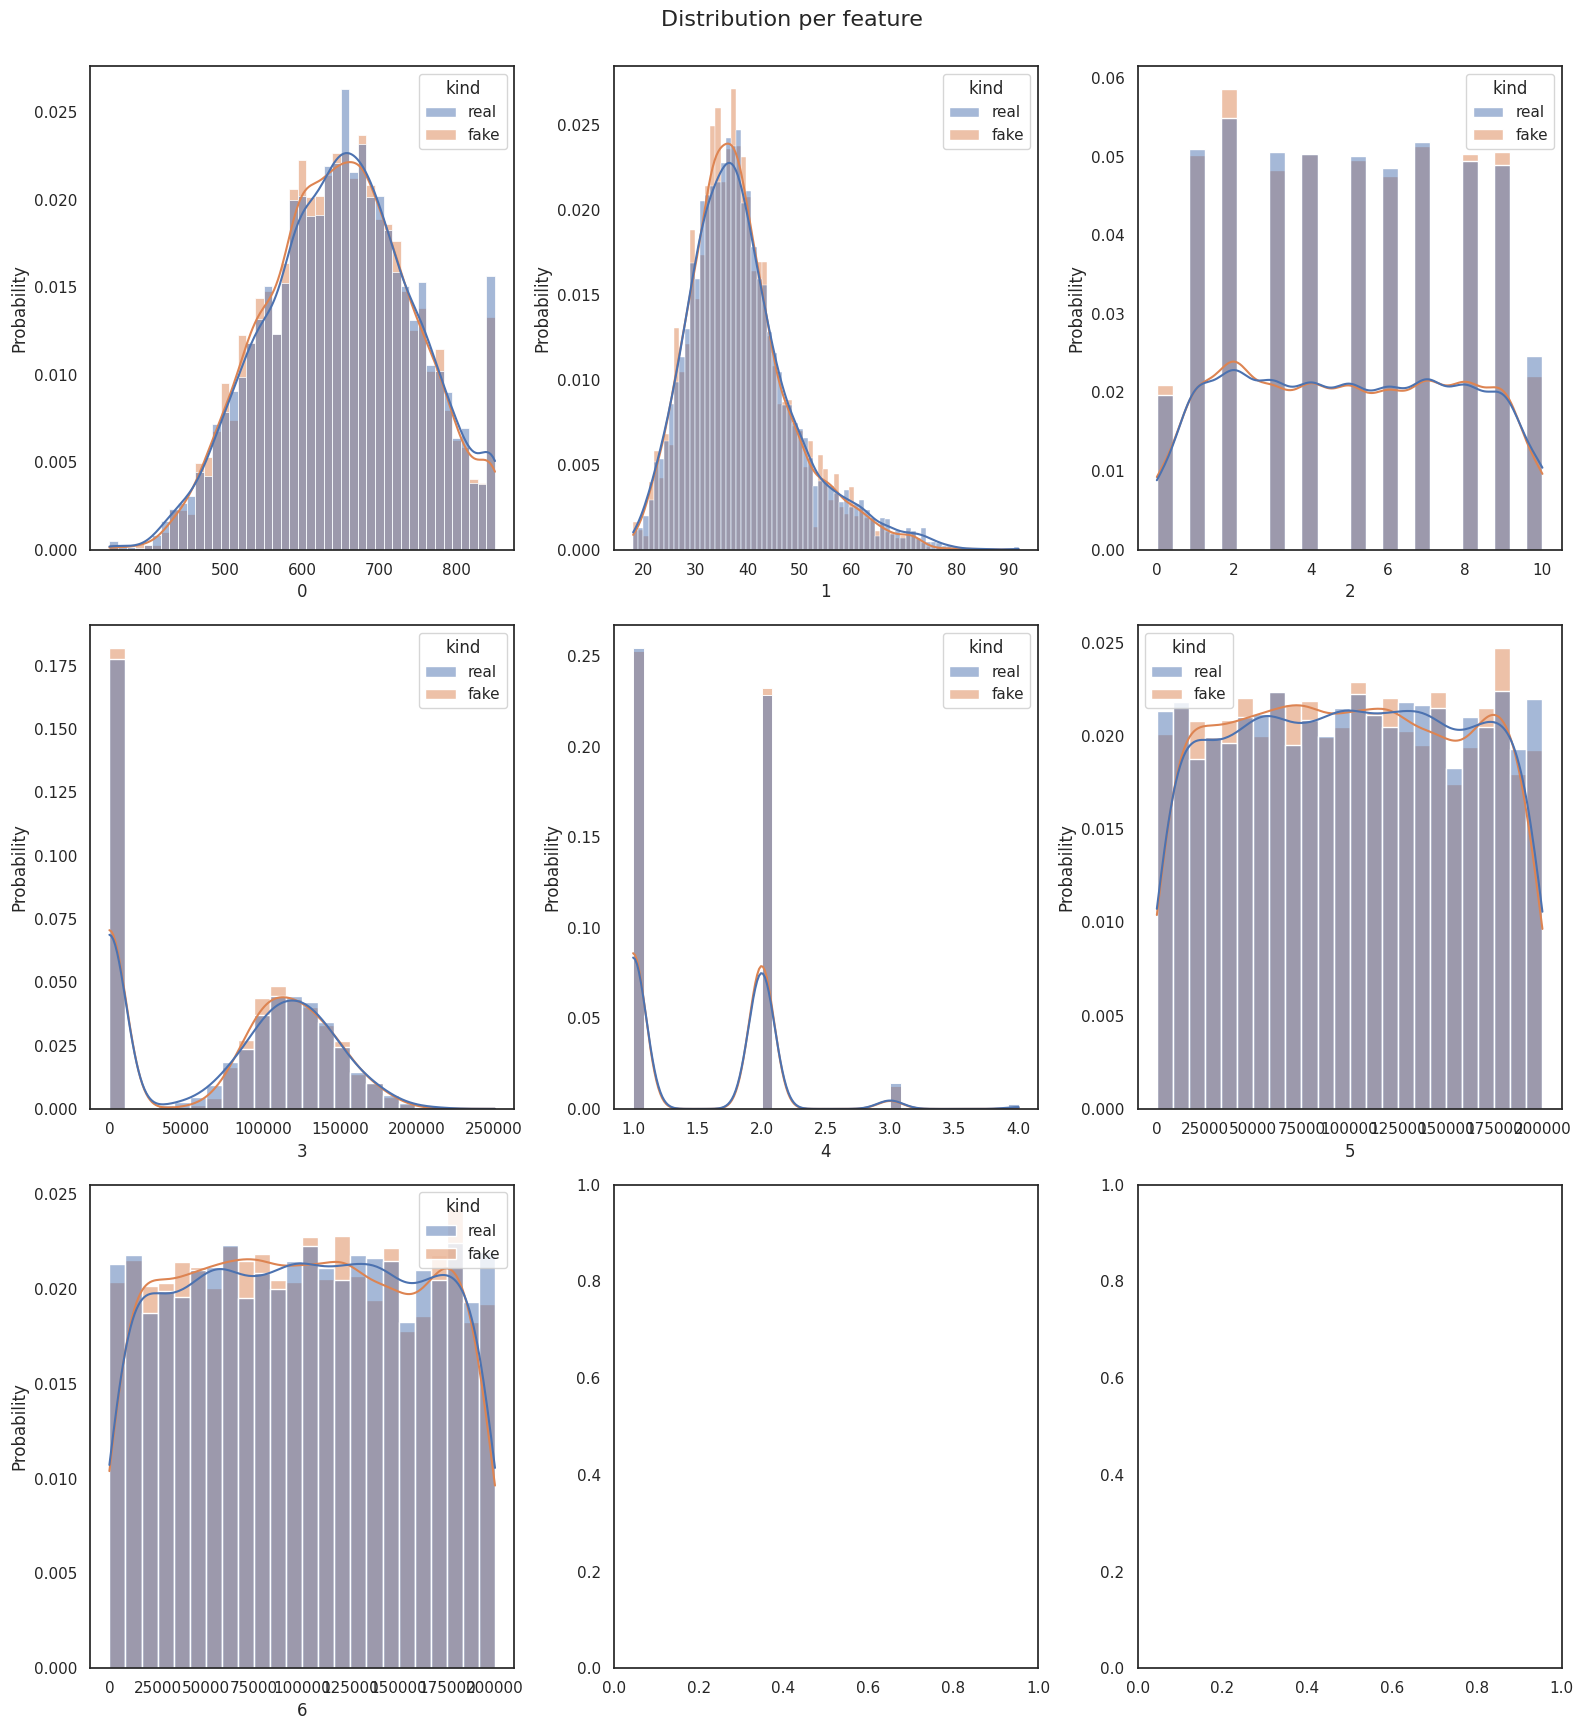

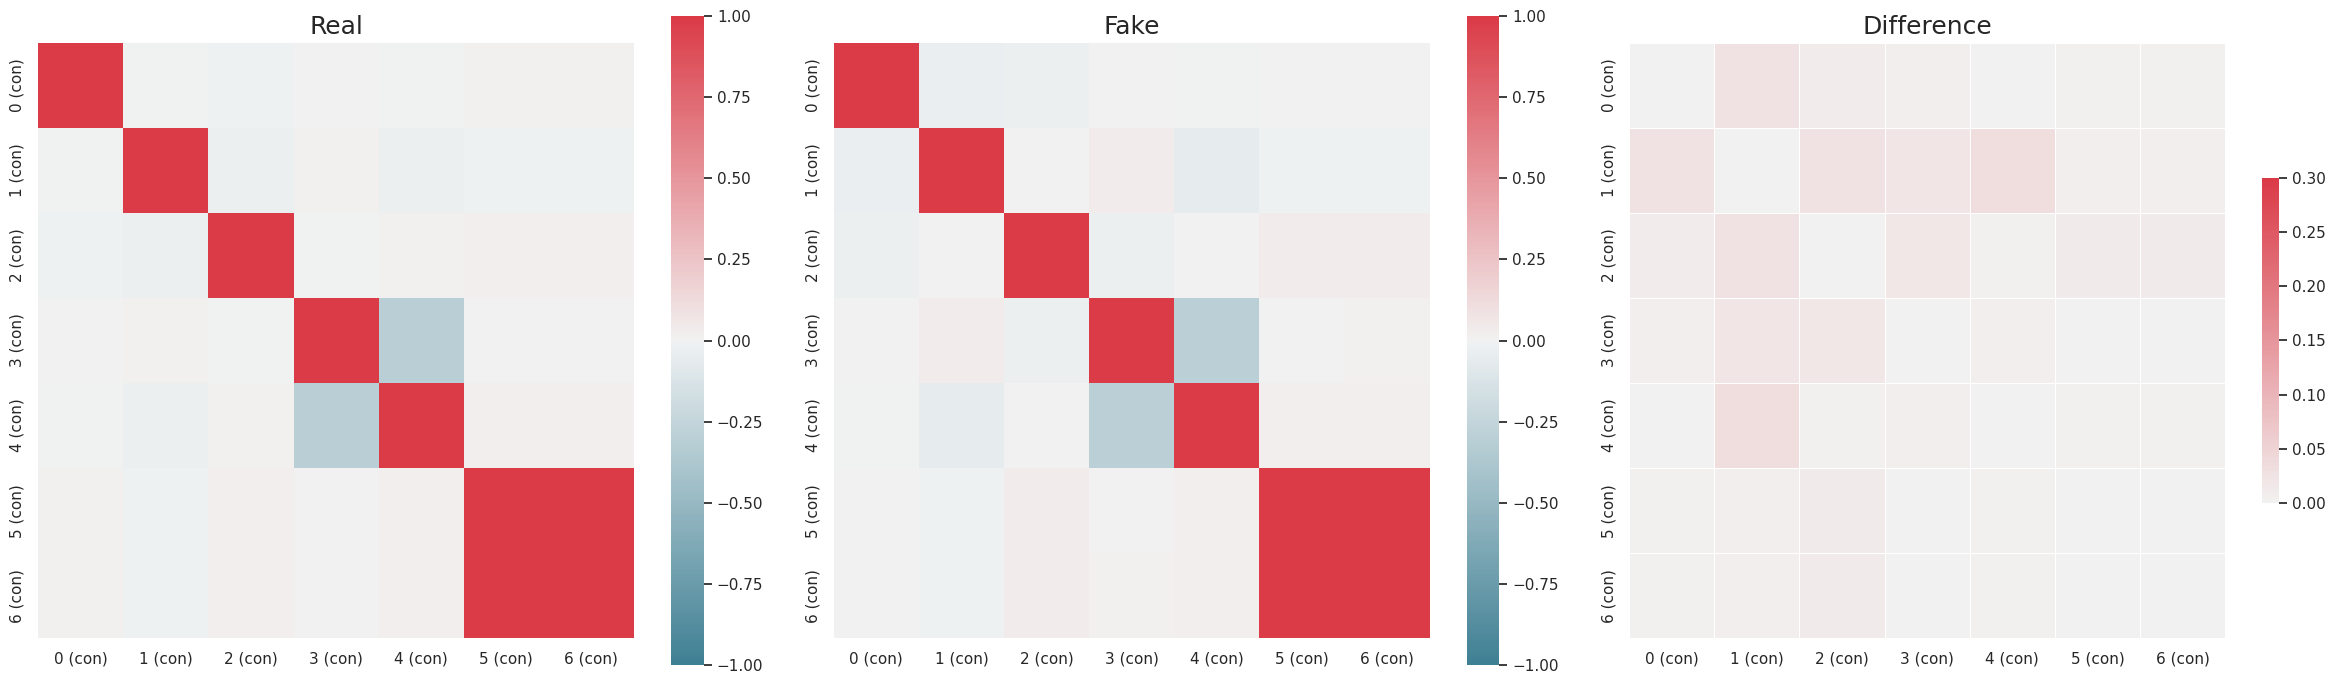

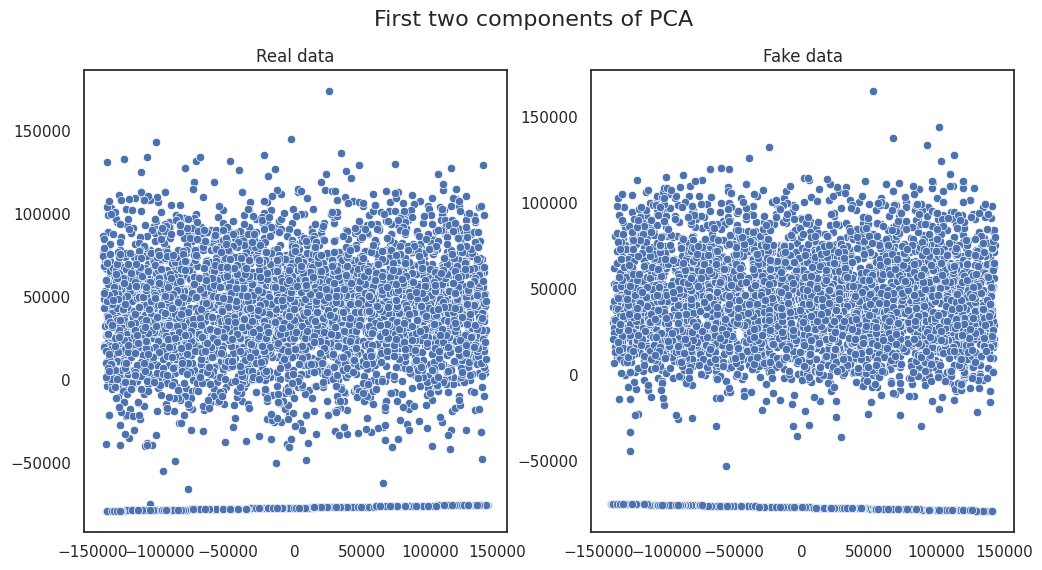

In [25]:
table_evaluator.visual_evaluation()

In [30]:
syndataPD.head()[0]

0   496.0466
1   659.9193
2   562.4032
3   655.7466
4   444.8195
Name: 0, dtype: float64

In [39]:
table_evaluator.evaluate(target_col=6)

ValueError: Unknown label type: 'continuous'

In [44]:
from ctgan import load_demo

real_data = load_demo()

# Names of the columns that are discrete
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

In [45]:
ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

/home/vtn/anaconda3/envs/msc-mm2/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/home/vtn/anaconda3/envs/msc-mm2/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/home/vtn/anaconda3/envs/msc-mm2/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/home/vtn/anaconda3/envs/msc-mm2/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT w

In [46]:
# Create synthetic data
synthetic_data_ctgan = ctgan.sample(1000)

In [47]:
table_evaluator_ctgan = TableEvaluator(real_data, synthetic_data_ctgan)

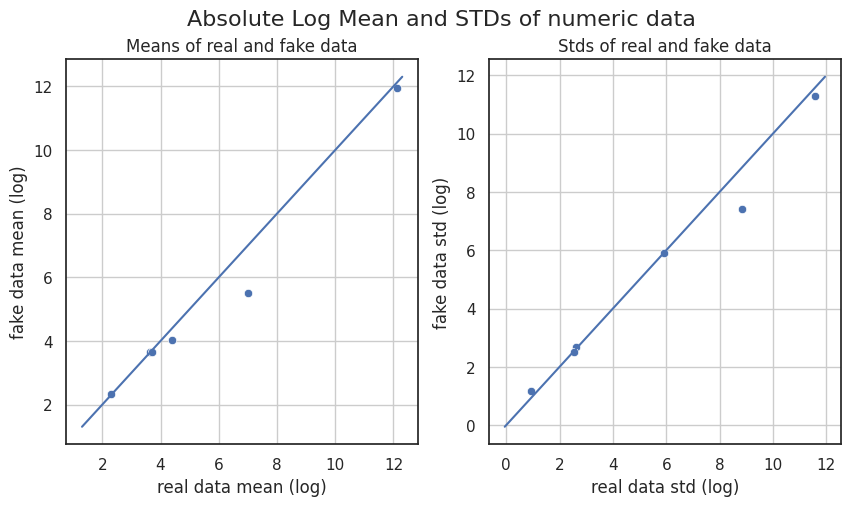

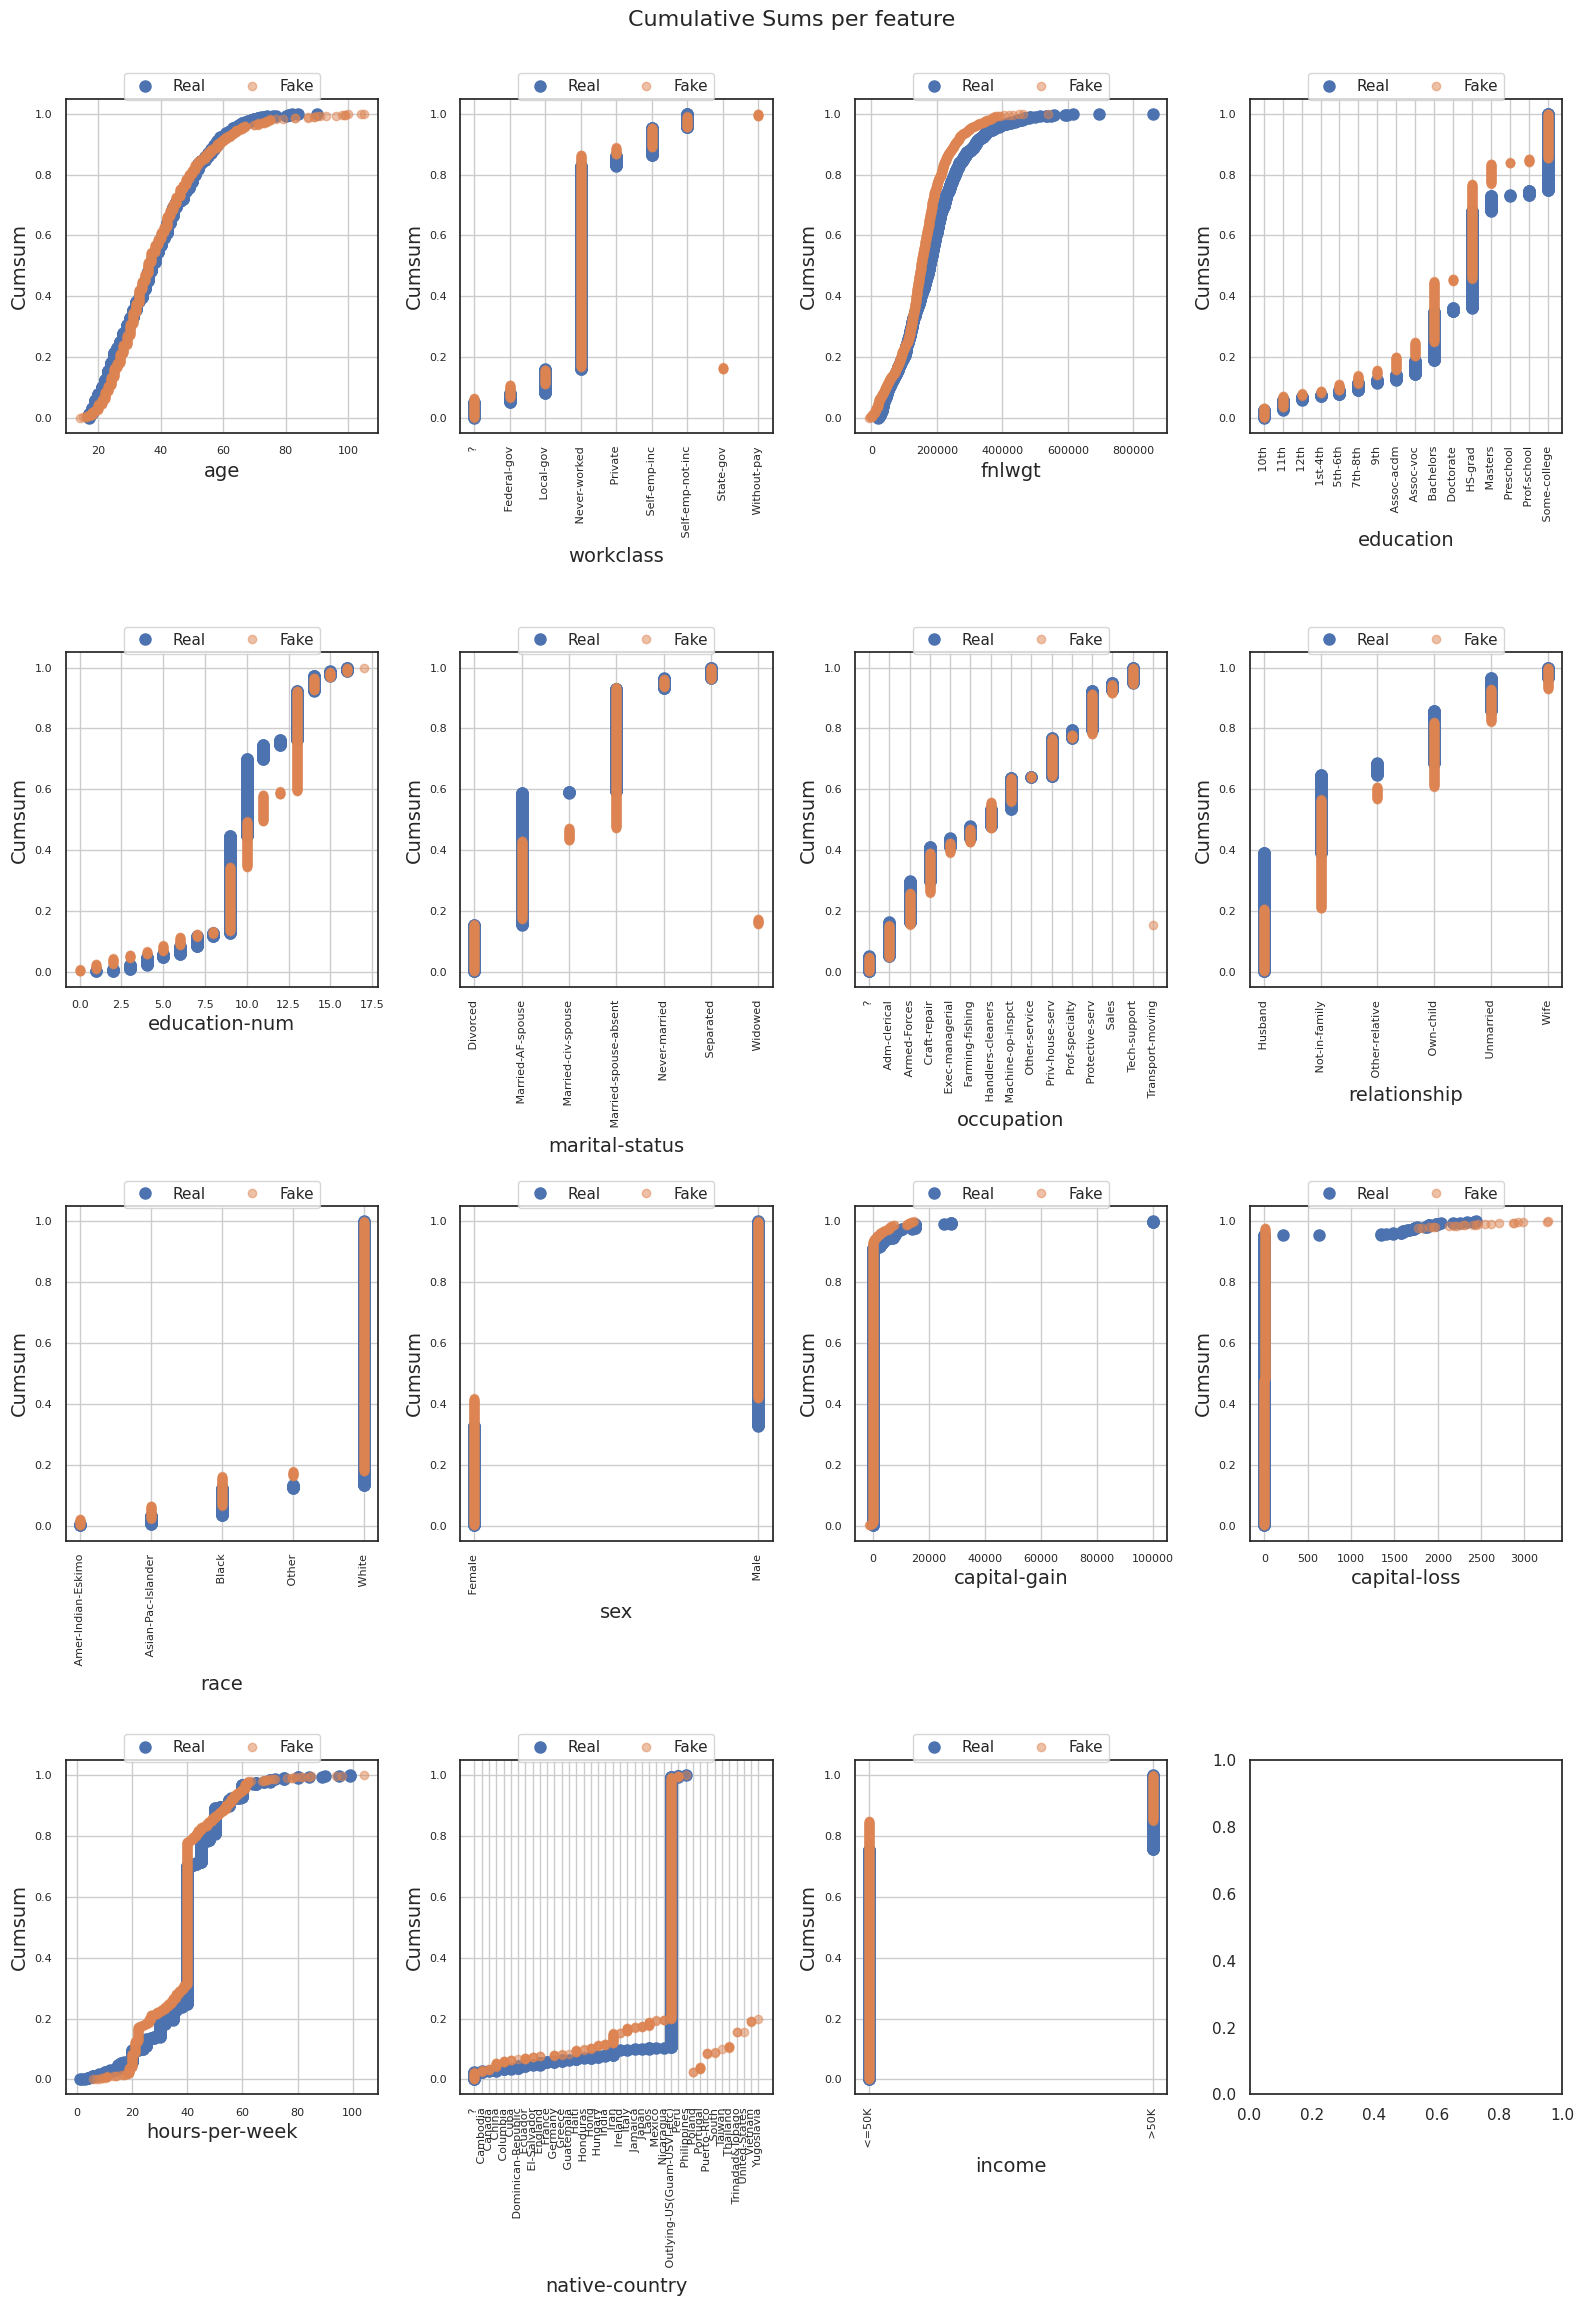

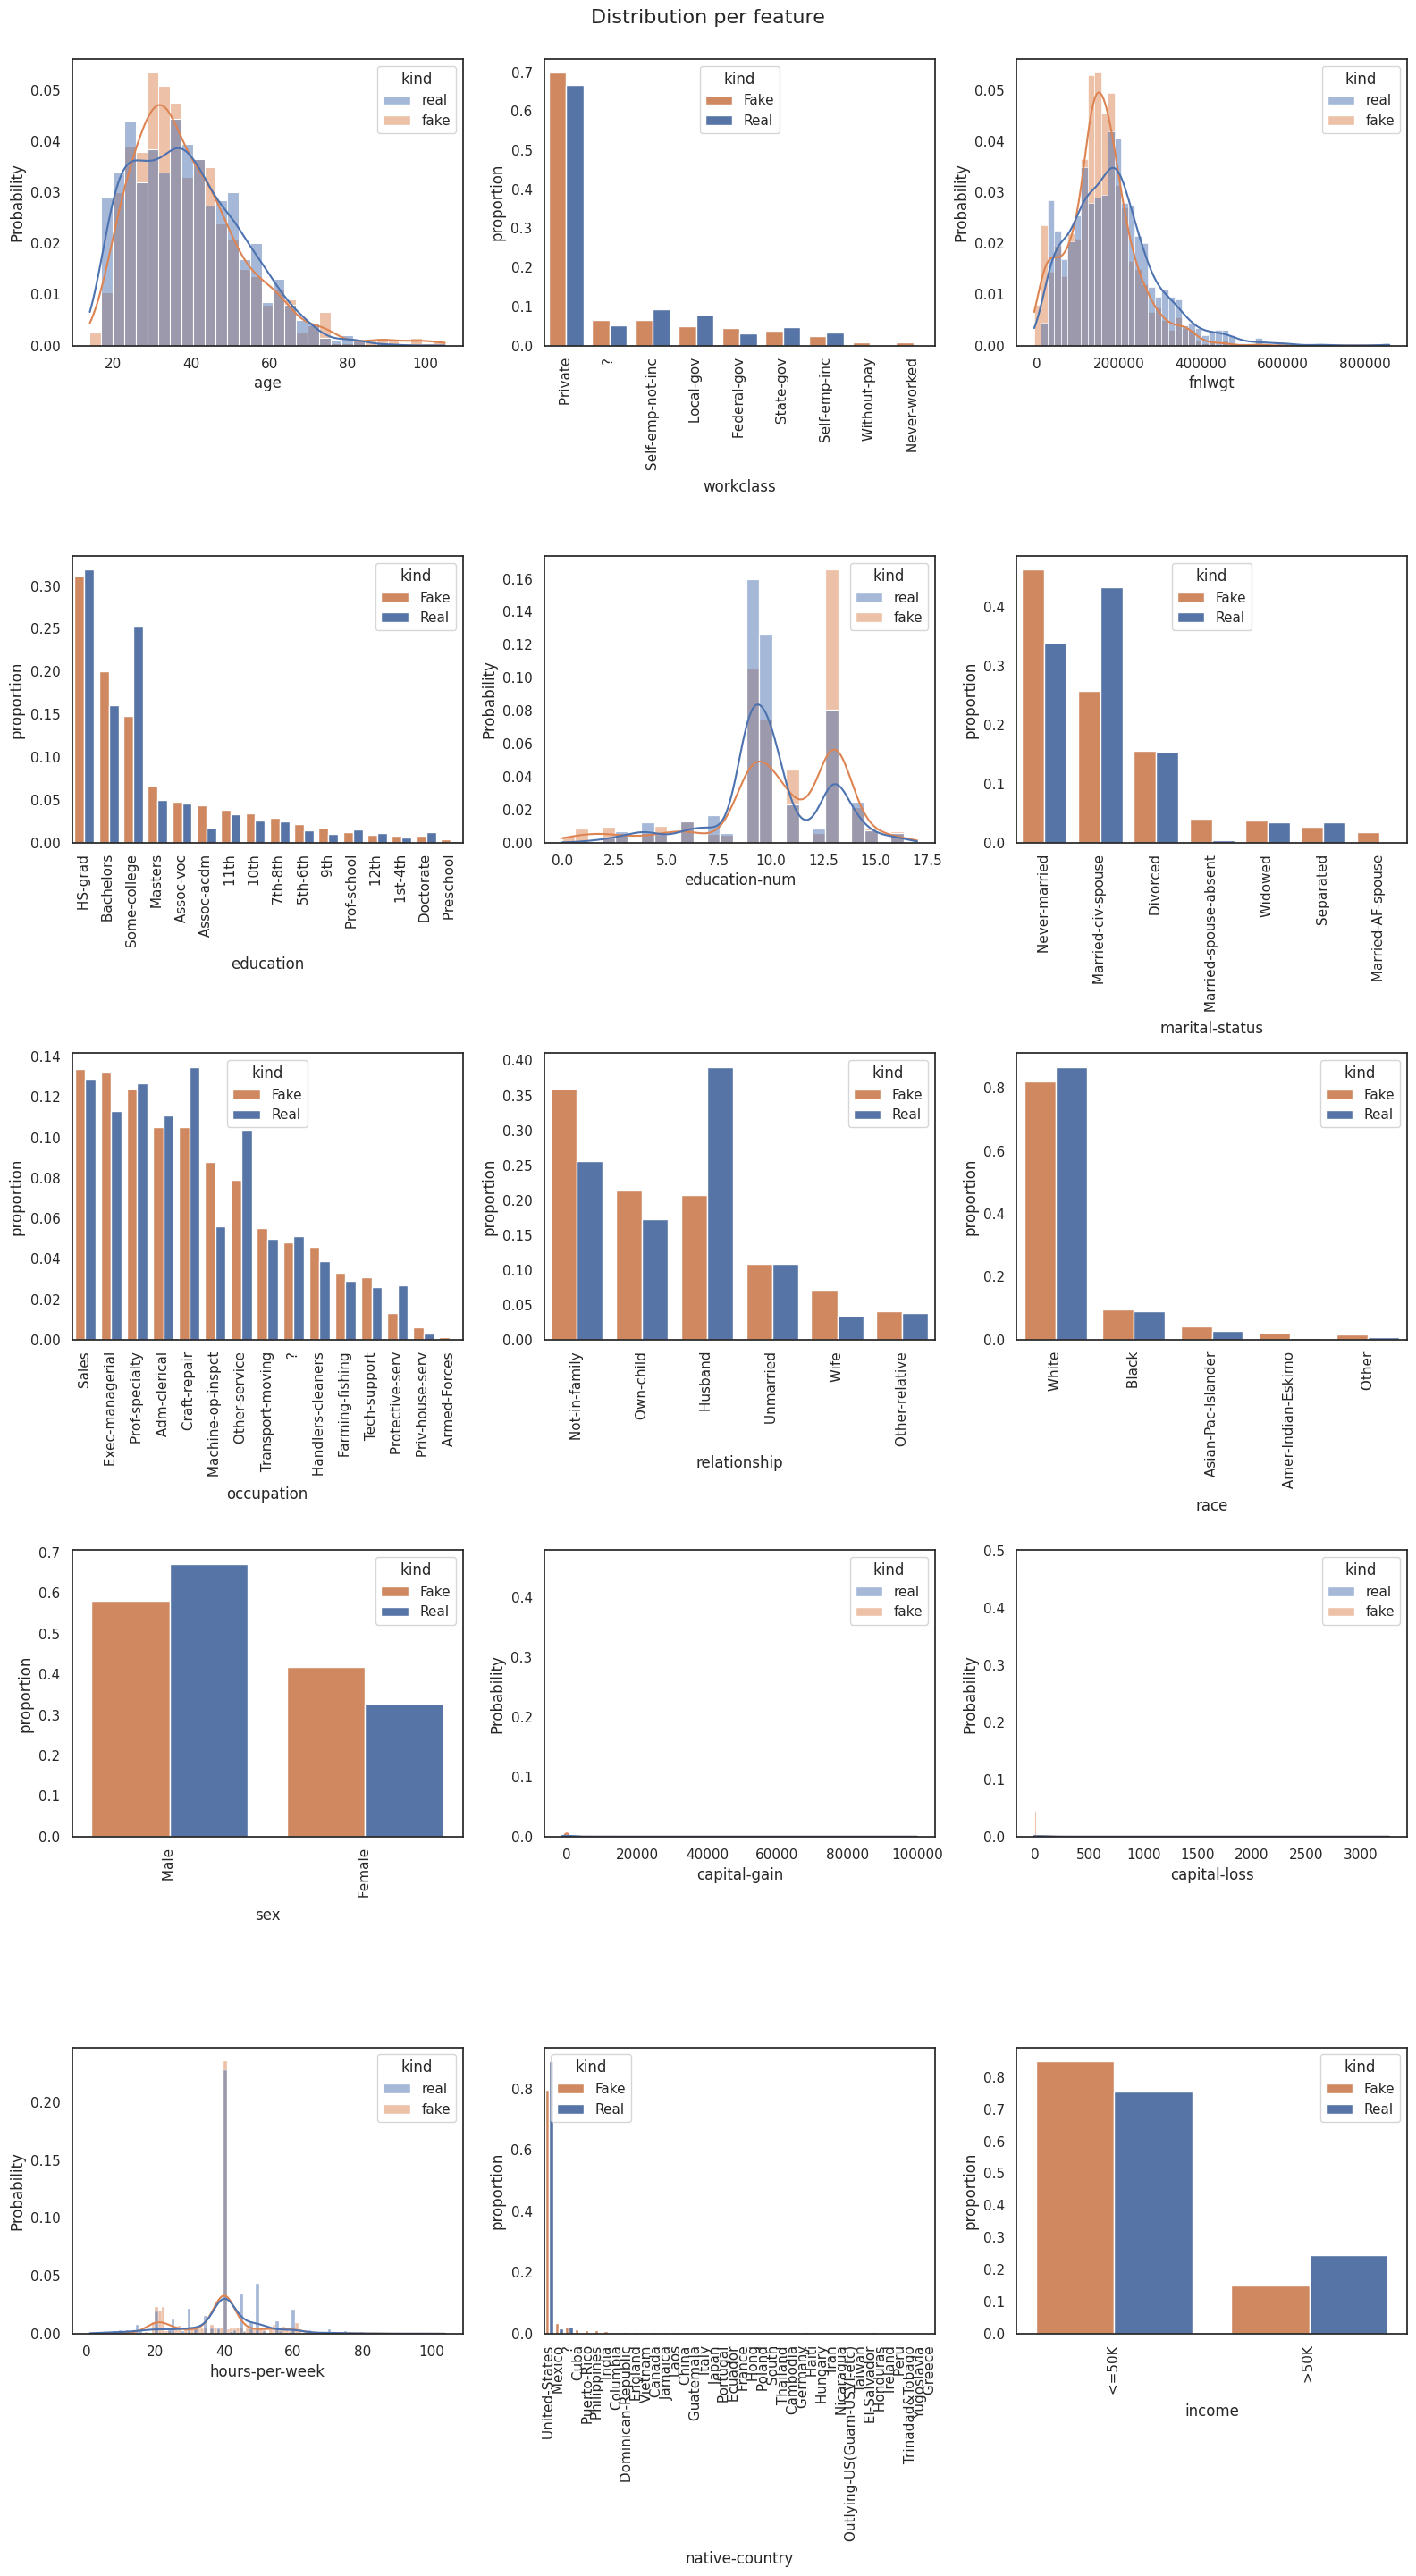

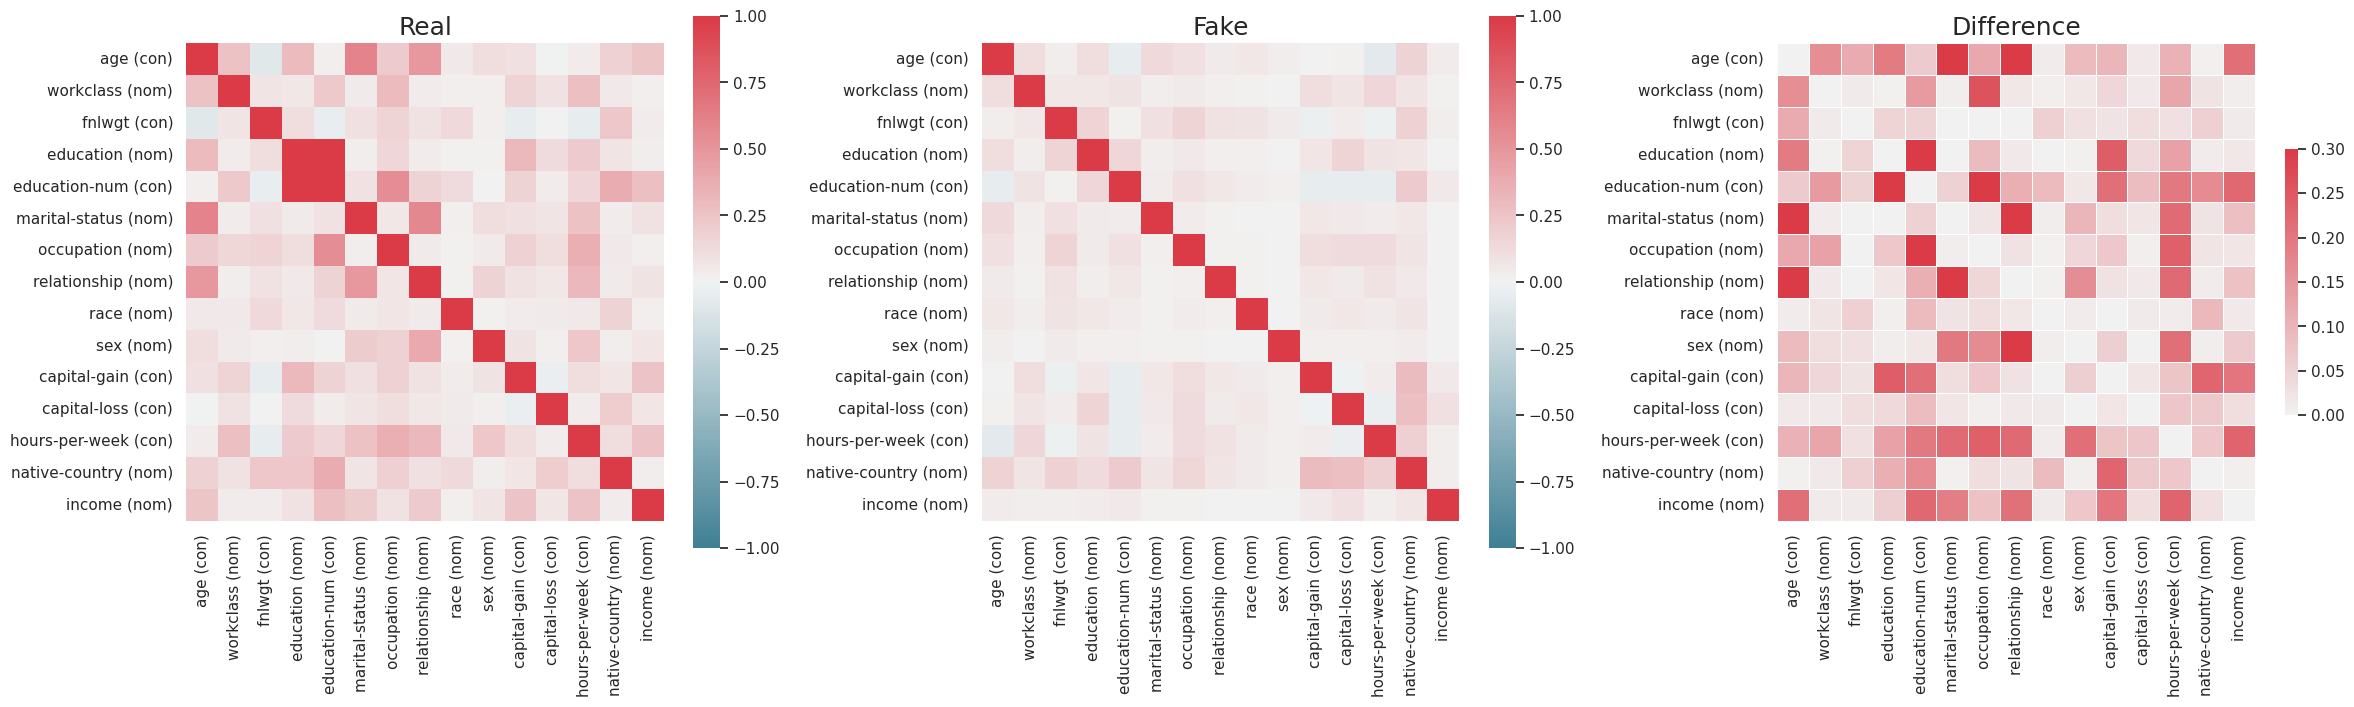

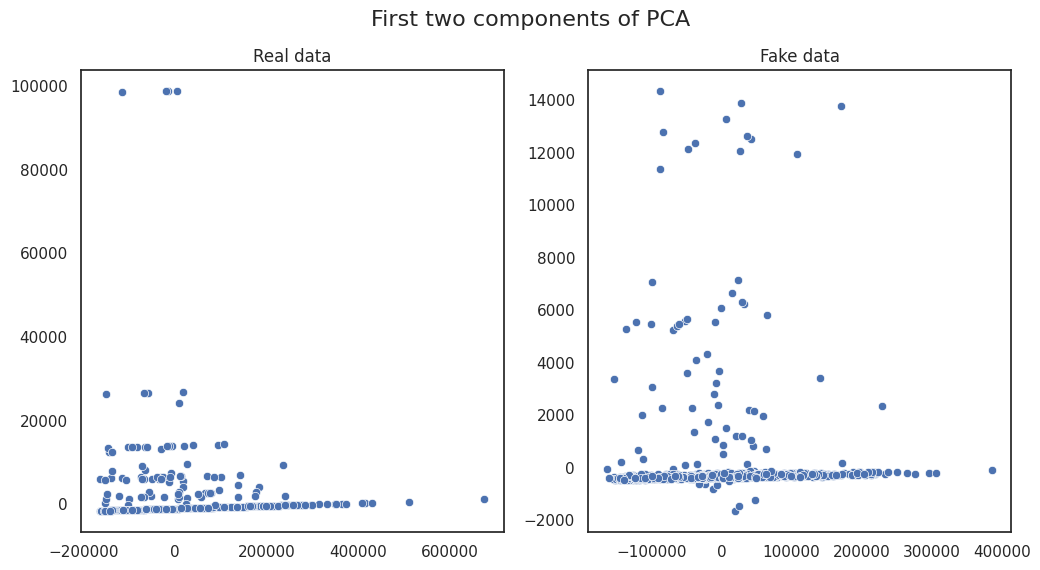

In [48]:
table_evaluator_ctgan.visual_evaluation()

In [49]:
synthetic_data_ctgan.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,21,Private,19864,Assoc-acdm,13,Divorced,Craft-repair,Wife,Asian-Pac-Islander,Male,4,3,56,United-States,<=50K
1,27,Self-emp-not-inc,93747,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,-71,5,40,Dominican-Republic,<=50K
2,22,Private,99037,HS-grad,13,Never-married,Other-service,Not-in-family,White,Female,-99,8,40,United-States,>50K
3,79,Private,136374,HS-grad,5,Never-married,Handlers-cleaners,Not-in-family,Black,Female,-136,1,21,United-States,<=50K
4,37,Private,125717,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Female,-142,1,40,United-States,>50K


In [53]:
table_evaluator.evaluate(target_col='age')

KeyError: "['age'] not found in axis"